## SimpleImputer
### This notebook outlines the usage of Simple Imputer (Univariate Imputation).
### Simple Imputer substitutes missing values statistics (mean, median, ...)
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [15]:
# categorical variables based on unique values
categorical_columns = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype in ['int64', 'float64']]
print("Number of Categorical Variables:", len(categorical_columns))
print("Categorical Variables:", categorical_columns)



Number of Categorical Variables: 8
Categorical Variables: ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [16]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum() # include code here
    perc = missing_data / len(df) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 105  |  Percentage: 2.48
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 29  |  Percentage: 0.68
Feature 6 >> Missing entries: 53  |  Percentage: 1.25
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 50  |  Percentage: 1.18
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 19  |  Percentage: 0.45
Feature 14 >> Missing entries: 1  |  Percentage: 0.02
Feature 15 >> Missing entries: 388  |  Percentage: 9.16
Feature 16 >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

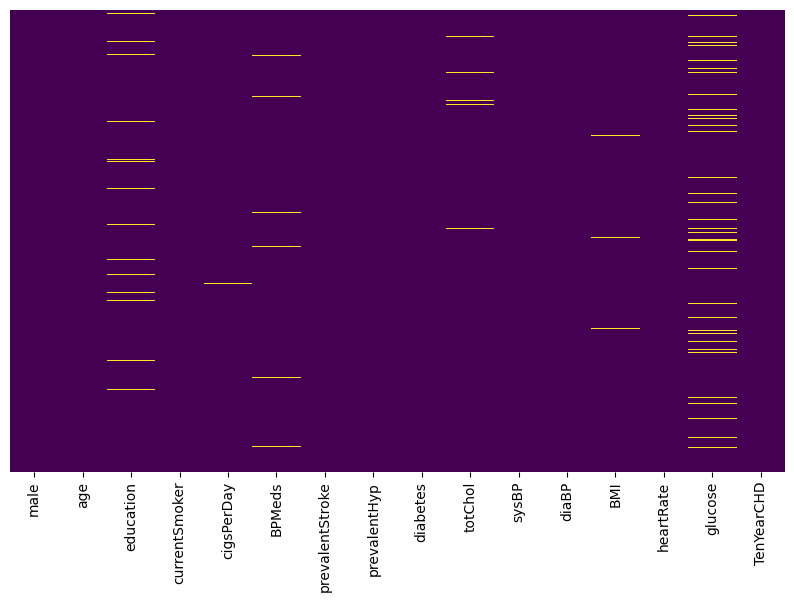

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import SimpleImputer

In [18]:
from sklearn.impute import SimpleImputer

### Create SimpleImputer object with 'mean' strategy

In [19]:
imputer = SimpleImputer(strategy='mean')

### Optional - converting df into numpy array (There is a way to directly impute from dataframe as well)

In [20]:
data = df.values

In [21]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to calculate statistic for each column

In [22]:
imputer.fit(X)

SimpleImputer()

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values from the calculated statistic using transform( )

In [23]:
X_imputed = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [24]:
missing_before = df.isnull().sum().sum()
print(f"Missing cells before imputation: {missing_before}")

Missing cells before imputation: 645


In [25]:
missing_after = pd.DataFrame(X_imputed, columns=df.columns[:-1]).isnull().sum().sum()
print(f"Missing cells after imputation: {missing_after}")

Missing cells after imputation: 0


### Let's try to visualize the missing values.

<Axes: >

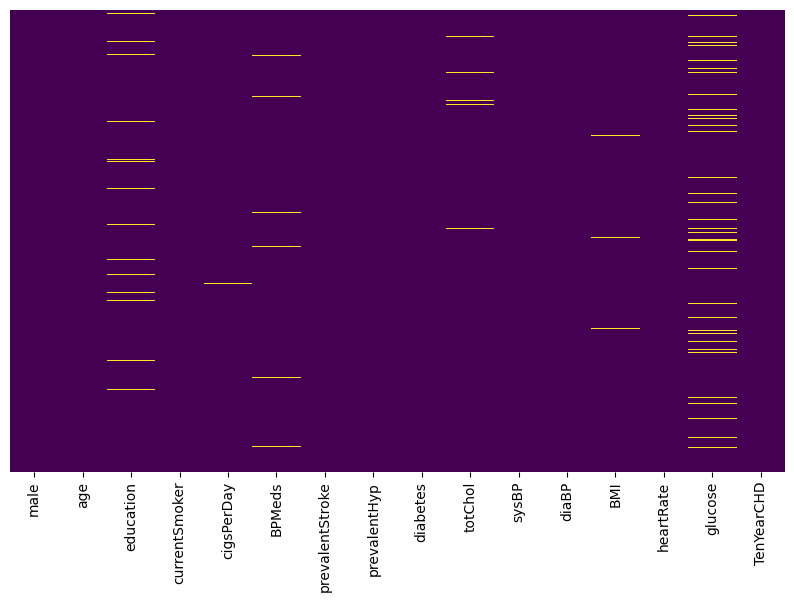

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

<Axes: >

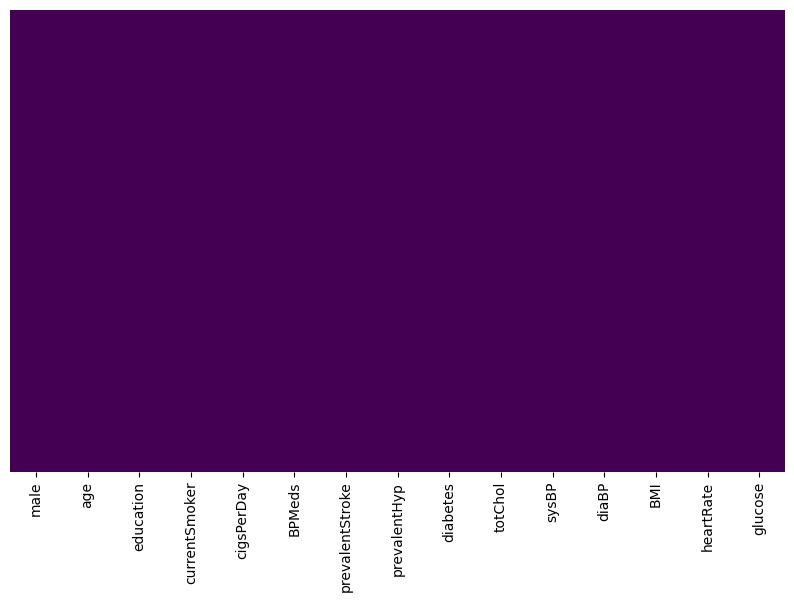

In [27]:
X_transform = pd.DataFrame(X_imputed, columns=df.columns[:-1])


plt.figure(figsize=(10,6))
sns.heatmap(X_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [28]:
# Convert the NumPy array back into a DataFrame
df_transform = pd.DataFrame(X_imputed, columns=df.columns[:-1])

# Add the target column back if necessary
df_transform['TenYearCHD'] = y

# Check the DataFrame structure
df_transform

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.000000,1.0
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.000000,0.0
4235,0.0,48.0,2.0,1.0,20.0,0.02963,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.966753,0.0


<Axes: >

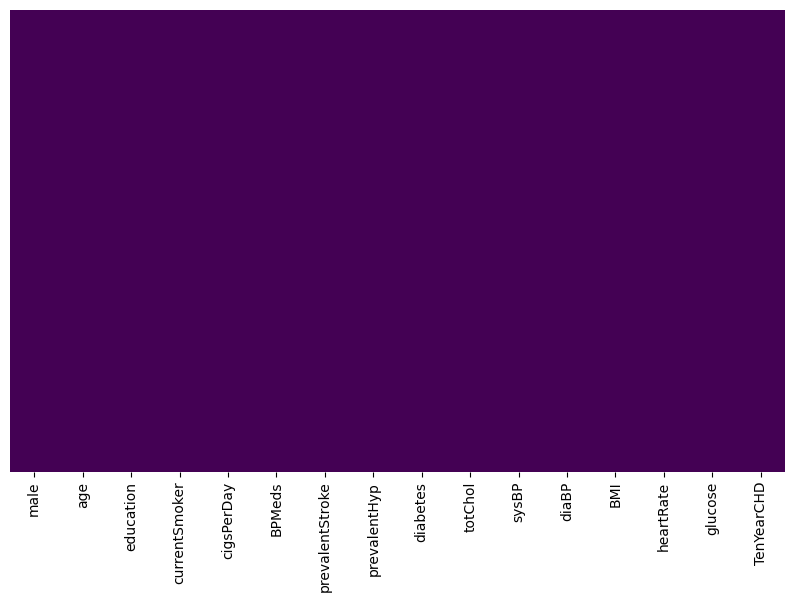

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Select 12 feature columns
selected_columns = df.columns[:12]
X = df[selected_columns]
Y = df.iloc[:, -1]

# Reduce the dataset size to 480 rows
data_sampled = df.sample(n=480, random_state=42)
X = data_sampled[selected_columns]
Y = data_sampled.iloc[:, -1]

# 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Handle missing values in X_train and X_test (using mean imputation)
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


Y_train = pd.DataFrame(Y_train, columns=["TenYearCHD"])
Y_test = pd.DataFrame(Y_test, columns=["TenYearCHD"])

# Save
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
Y_train.to_csv("Y_train.csv", index=False)
Y_test.to_csv("Y_test.csv", index=False)

In [44]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [45]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

<Axes: >

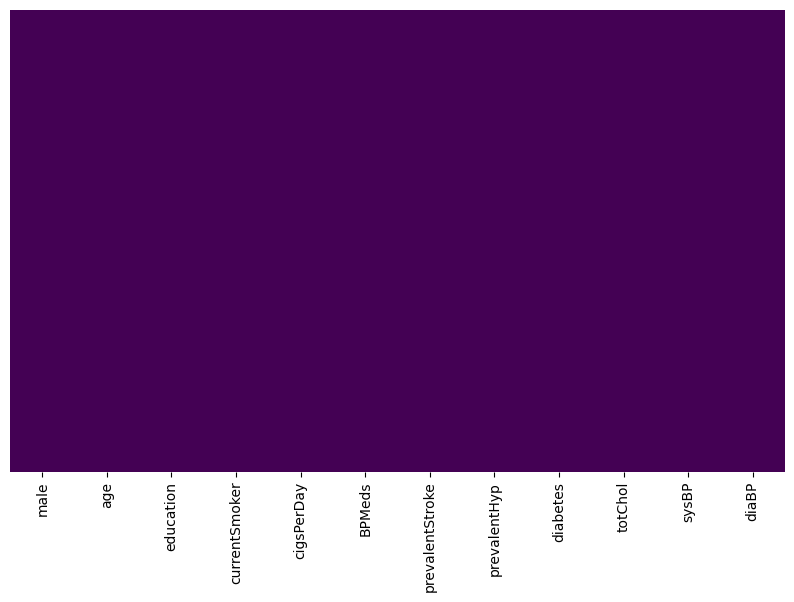

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Is there missing data in this dataset???

## Initially, X_train had missing values. However, these were handled using mean imputation (load the data part with these lines).



*   imputer = SimpleImputer(strategy="mean")
*   X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
*  X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)






In [50]:
def check_missing_data(dataset_name, dataset):
    missing_data = dataset.isnull().sum().sum()
    if missing_data > 0:
        print(f"Yes, there is missing data in {dataset_name}. Total missing values: {missing_data}")
    else:
        print(f"No, there is no missing data in {dataset_name}.")
    return missing_data

print("Checking for missing data in all datasets:\n")
missing_in_x_train = check_missing_data("X_train", X_train)
missing_in_x_test = check_missing_data("X_test", X_test)
missing_in_y_train = check_missing_data("Y_train", Y_train)
missing_in_y_test = check_missing_data("Y_test", Y_test)

Checking for missing data in all datasets:

No, there is no missing data in X_train.
No, there is no missing data in X_test.
No, there is no missing data in Y_train.
No, there is no missing data in Y_test.


# Build a Logistic Regression model Without imputation

In [47]:
df=pd.read_csv("heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
model = LogisticRegression(max_iter=5000)

In [62]:
df_cleaned = df.dropna()  # Drop rows with missing values in the entire dataset
X = df_cleaned[df_cleaned.columns[:-1]]
y = df_cleaned[df_cleaned.columns[-1]]

model.fit(X,y)


LogisticRegression(max_iter=5000)

# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [65]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [66]:
df.shape

(4238, 16)

### Drop rows with missing values

In [67]:
df = df.dropna()
df.shape

(3656, 16)

### Split dataset into X and y

In [68]:
X = df[df.columns[:-1]]
X.shape

(3656, 15)

In [69]:
y = df[df.columns[-1]]
y.shape

(3656,)

### Create a pipeline with model parameter

In [70]:
pipeline = Pipeline([('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [71]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [72]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [73]:
scores

array([0.85245902, 0.8579235 , 0.85245902, 0.85519126, 0.85245902,
       0.8442623 , 0.85205479, 0.8739726 , 0.84931507, 0.85479452,
       0.86612022, 0.84972678, 0.8579235 , 0.8442623 , 0.84699454,
       0.84699454, 0.85753425, 0.85205479, 0.85479452, 0.85205479,
       0.85245902, 0.86065574, 0.85245902, 0.84153005, 0.87431694,
       0.84699454, 0.85479452, 0.84657534, 0.85753425, 0.84383562])

### Print the Mean Accuracy and Standard Deviation from scores

In [74]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.853  | Std: 0.008


# Build a Logistic Regression model with SimpleImputer Mean Strategy

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [77]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [78]:
df.shape

(4238, 16)

In [79]:
X = df[df.columns[:-1]]
X.shape

(4238, 15)

In [80]:
y = df[df.columns[-1]]
y

,TenYearCHD
0,0
1,0
2,0
3,1
4,0
...,...
4233,1
4234,0
4235,0
4236,0


### Create a SimpleImputer with mean strategy

In [82]:
imputer = SimpleImputer(strategy='mean')

### Create a Logistic Regression model

In [83]:
model = LogisticRegression()

### Create a pipeline with impute and model parameters

In [84]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [85]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [86]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [87]:
scores

array([0.84669811, 0.85141509, 0.84669811, 0.8490566 , 0.84669811,
       0.84669811, 0.85141509, 0.8490566 , 0.85579196, 0.85106383,
       0.85141509, 0.85377358, 0.8490566 , 0.85613208, 0.84669811,
       0.85613208, 0.84433962, 0.8490566 , 0.8534279 , 0.85579196,
       0.85141509, 0.8490566 , 0.8490566 , 0.84669811, 0.85141509,
       0.85141509, 0.85141509, 0.85613208, 0.85106383, 0.8463357 ])

### Print the Mean Accuracy and Standard Deviation

In [88]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.85  | Std: 0.003


### Which accuracy is better?
- Dropping missing values
- SimpleImputer with Mean Strategy

In [90]:
accuracy_drop = 0.853
std_drop = 0.008

accuracy_impute = 0.85
std_impute = 0.003

# comparison and analysis
print(f"Comparison of Model Performance:")
print(f"1. Dropping Missing Values: Mean Accuracy = {accuracy_drop}, Std = {std_drop}")
print(f"2. SimpleImputer (Mean Strategy): Mean Accuracy = {accuracy_impute}, Std = {std_impute}\n")

if accuracy_drop > accuracy_impute:
    print(f"The model trained by dropping missing values performed better with a higher mean accuracy of {accuracy_drop:.3f}.")
else:
    print(f"The model trained using SimpleImputer performed better with a higher mean accuracy of {accuracy_impute:.3f}.")

if std_drop > std_impute:
    print(f"However, the model using SimpleImputer had more consistent results with a lower standard deviation (Std = {std_impute:.3f}) compared to dropping missing values (Std = {std_drop:.3f}).")
else:
    print(f"The model by dropping missing values was more consistent with a lower standard deviation (Std = {std_drop:.3f}).")


Comparison of Model Performance:
1. Dropping Missing Values: Mean Accuracy = 0.853, Std = 0.008
2. SimpleImputer (Mean Strategy): Mean Accuracy = 0.85, Std = 0.003

The model trained by dropping missing values performed better with a higher mean accuracy of 0.853.
However, the model using SimpleImputer had more consistent results with a lower standard deviation (Std = 0.003) compared to dropping missing values (Std = 0.008).


# SimpleImputer Mean - Benchmark after Mean imputation with RandomForest

### Import libraries

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

### Create a SimpleImputer with mean strategy

In [92]:
imputer = SimpleImputer(strategy='mean')

### Create a RandomForest model

In [93]:
model = RandomForestClassifier(random_state=42)

### Create a pipeline

In [94]:
pipeline = Pipeline(steps=[('imputer', imputer), ('model', model)])

### Create RepeatedStratifiedKFold

In [98]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Create Cross_val_score

In [99]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [101]:
scores

array([0.85849057, 0.84433962, 0.8490566 , 0.83018868, 0.85849057,
       0.85141509, 0.85141509, 0.8490566 , 0.8534279 , 0.85106383,
       0.84433962, 0.84198113, 0.84669811, 0.85141509, 0.84669811,
       0.85377358, 0.84669811, 0.84433962, 0.84869976, 0.86052009,
       0.83962264, 0.84433962, 0.84433962, 0.84433962, 0.84669811,
       0.84669811, 0.84198113, 0.84669811, 0.85106383, 0.85106383])

### Print Mean Accuracy and Standard Deviation

In [100]:
print(f"Mean Accuracy: {scores.mean():.3f} | Standard Deviation: {scores.std():.3f}")

Mean Accuracy: 0.848 | Standard Deviation: 0.006


# Assignment
# Run experiments with different Strategies and different algorithms

## STRATEGIES
- Mean
- Median
- Most_frequent
- Constant

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

#### Hint: Collect the pipeline creation, KFold, and Cross_Val_Score inside a for loop and iterate over different strategies in a list and different algorithms in a list

In [107]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from IPython.display import display

df = pd.read_csv("heart_disease.csv")
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# drop rows with missing target values
X = X.dropna()
y = y[X.index]

# Strategies and Algorithms
strategies = ['mean', 'median', 'most_frequent', 'constant']
algorithms = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Gradient Boosting (Bonus)': RandomForestClassifier()
}

results = []

for strategy in strategies:
    for algo_name, algo in algorithms.items():
        if strategy == 'constant':
            imputer = SimpleImputer(strategy='constant', fill_value=0)
        else:
            imputer = SimpleImputer(strategy=strategy)

        pipeline = Pipeline(steps=[('imputer', imputer), ('model', algo)])

        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

        results.append({
            'Strategy': strategy,
            'Algorithm': algo_name,
            'Mean Accuracy': scores.mean(),
            'Std Deviation': scores.std()
        })

results_df = pd.DataFrame(results)

display(results_df)


,Strategy,Algorithm,Mean Accuracy,Std Deviation
0,mean,Logistic Regression,0.847919,0.005608
1,mean,Random Forest,0.846556,0.007767
2,mean,KNN,0.834245,0.008637
3,mean,SVM,0.847283,0.002085
4,mean,Gradient Boosting (Bonus),0.846372,0.007551
5,median,Logistic Regression,0.847919,0.005608
6,median,Random Forest,0.847284,0.008267
7,median,KNN,0.834245,0.008637
8,median,SVM,0.847283,0.002085
9,median,Gradient Boosting (Bonus),0.846006,0.006280


# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
- MEAN
- MEDIAN
- MOST_FREQUENT
- CONSTANT

In [115]:
rf_results = results_df[results_df['Algorithm'] == 'Random Forest']

best_rf_strategy = rf_results.sort_values(by='Mean Accuracy', ascending=False).iloc[0]
print("Best strategy for Random Forest:", best_rf_strategy['Strategy'])


Best strategy for Random Forest: most_frequent


# Q2:  Which is the best algorithm for this dataset using Mean Strategy?
- Logistic Regression
- Random Forest
- KNN
- any other algorithm of your choice (BONUS)

In [112]:
mean_strategy_results = results_df[results_df['Strategy'] == 'mean']

best_mean_algo = mean_strategy_results.sort_values(by='Mean Accuracy', ascending=False).iloc[0]
print("Best algorithm for Mean strategy:", best_mean_algo['Algorithm'])


Best algorithm for Mean strategy: Logistic Regression


# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
- Mean , Median, Most_frequent, Constant
- Logistic Regression, Random Forest, KNN

In [113]:
best_combination = results_df.sort_values(by='Mean Accuracy', ascending=False).iloc[0]
print("Best overall combination:")
print(f"Strategy: {best_combination['Strategy']}, Algorithm: {best_combination['Algorithm']}, Accuracy: {best_combination['Mean Accuracy']:.3f}")


Best overall combination:
Strategy: most_frequent, Algorithm: Random Forest, Accuracy: 0.848
